# The Metropolis-Hastings method

Random-Walk Metropolis:
$$P\left(x^j,x^{\ast}\right)=\min\left(1,\frac{f\left(x^{\ast}\right)}{f\left(x^j\right)}\times\frac{q\left(x^j\mid x^{\ast}\right)}{q\left(x^{\ast}\mid x^j\right)}\right)$$

If the proposal distribution is symmetrical:
$$P\left(x^j,x^{\ast}\right)=\min\left(1,\frac{f\left(x^{\ast}\right)}{f\left(x^j\right)}\right)$$


Theorem 3.1. Let $X_{n}$ be an irreducible aperiodic Markov chain with finite state space $\Omega$ and stationary distribution $\pi$. Let $r : \Omega \rightarrow R$ be any function. Then
$$\lim_{N\to\infty}\left(\frac{1}{N}\times\sum_{i=1}^Nr\left(X_i\right)=E_{\pi}\left(r\right)\right)$$


In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import signal
import numpy as np

In [2]:
def target_function(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return (
            (3 - abs(x)) / 2 -
            3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

In [7]:
samples = [0]
for i in range(5*10**5):
    proposal = stats.norm.rvs(samples[-1], 2)
    # Since the proposal distribution is symmetrical
    p = min(1, target_function(proposal) / target_function(samples[-1]))
    # Accept the proposal
    if np.random.uniform(0, 1) < p:
        samples.append(proposal)
    # Reject the proposal
    else:
        samples.append(samples[-1])
# Pick multiples of 100 indices from the samples [ensure they're uncorrelated]
samples100 = np.take(samples, np.arange(100, len(samples), 100))

In [4]:
def plotting_function(array):
    x = np.linspace(-10, 10, 10**3)
    plt.figure(figsize=(12, 10))
    plt.subplot(2,1,1)
    plt.hist(array, bins=100, density=True, alpha=.5)
    plt.plot(x, [target_function(_) for _ in x], color='black')
    plt.subplot(2,1,2)
    plt.acorr(array, maxlags=20, 
              detrend=lambda array: signal.detrend(array, type='constant'))
    plt.title('Autocorrelation')
    plt.show()

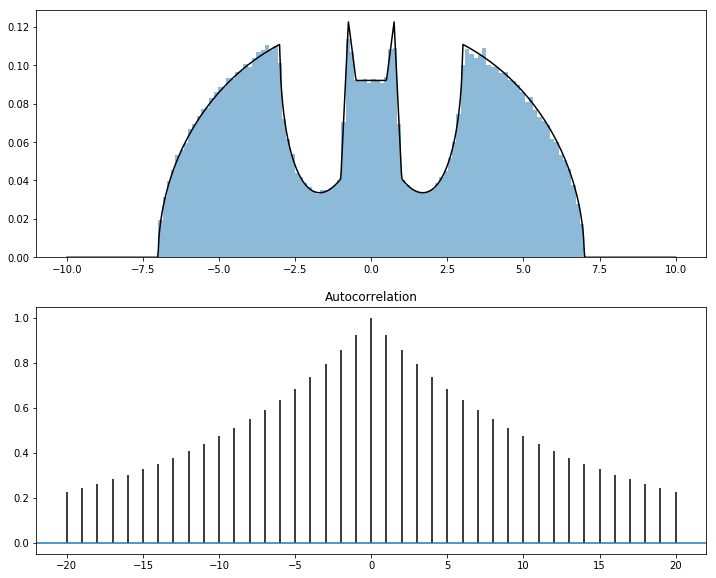

In [8]:
# Taking all samples
plotting_function(samples)

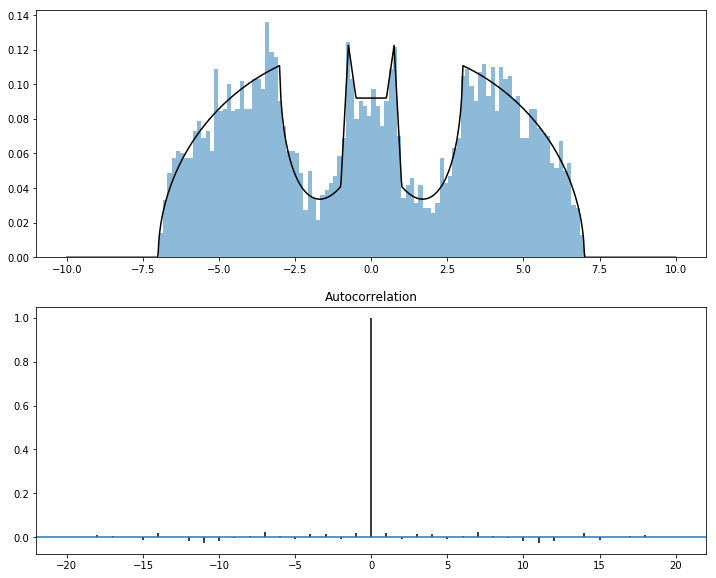

In [9]:
# Taking every 100th sample
plotting_function(samples100)